In [1]:
#Data Analysis
import pandas as pd
import numpy as np
# Modeling
import statsmodels.api as sm
from pygam import GAM, ExpectileGAM, s, f
from sklearn.preprocessing import LabelEncoder
# Visualization
import plotly.express as px
from plotnine import *
import pytimetk as tk
import textwrap 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [37]:
data_try = pd.read_excel('data_pred.xlsx')

In [13]:
data['pred_q0.025'] = data['pred_q0.025'].round(0).astype(int)
data['pred_q0.5']   = data['pred_q0.5'].round(0).astype(int)
data['pred_q0.975'] = data['pred_q0.975'].round(0).astype(int)

In [39]:
data_try['rev__q0.025'] = data_try['pred_q0.025'] * data_try['paid price']
data_try['rev__q0.5']   = data_try['pred_q0.5']   * data_try['paid price']
data_try['rev__q0.975'] = data_try['pred_q0.975'] * data_try['paid price']

In [40]:
data_try

,arrival day,type de chambre,booking lead,is-week-end,res day,season,arr month,arr day,is_promo,taux occ arr,nbre res,paid price,rev par type de chambre,event,pred_q0.025,pred_q0.5,pred_q0.975,rev__q0.025,rev__q0.5,rev__q0.975
0,2024-01-01,single,2,False,2023-12-30,winter,1,1,False,0.36,144,728.13,97643.77,no_promo,124.368396,139.183923,166.975651,90556.360418,101343.990023,121579.980603
1,2024-01-01,single,62,False,2023-10-31,winter,1,1,False,0.36,144,676.01,97643.77,no_promo,124.932669,141.352999,173.010672,84455.733538,95556.040673,116956.944154
2,2024-01-01,single,71,False,2023-10-22,winter,1,1,False,0.36,144,667.57,97643.77,no_promo,131.622044,166.973633,210.676371,87866.928103,111466.588096,140641.224928
3,2024-01-01,single,49,False,2023-11-13,winter,1,1,True,0.36,144,639.01,97643.77,is_promo,125.844812,145.770657,182.286368,80416.093195,93148.907295,116482.812068
4,2024-01-01,single,0,False,2024-01-01,winter,1,1,False,0.36,144,722.32,97643.77,no_promo,126.174469,148.988993,187.222608,91138.342315,107617.729210,135234.634181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267970,2025-06-30,family,80,False,2025-04-11,summer,6,30,False,0.35,70,1465.57,104947.60,no_promo,67.922484,87.055776,108.031225,99545.154183,127586.333131,158327.322844
267971,2025-06-30,family,12,False,2025-06-18,summer,6,30,False,0.35,70,1592.27,104947.60,no_promo,62.731404,72.875287,91.672242,99885.333427,116037.133709,145966.960623
267972,2025-06-30,family,6,False,2025-06-24,summer,6,30,True,0.35,70,1468.10,104947.60,is_promo,64.501180,77.846902,96.764855,94694.181637,114287.037200,142060.483299
267973,2025-06-30,family,5,False,2025-06-25,summer,6,30,True,0.35,70,1470.13,104947.60,is_promo,64.104430,76.835593,95.187637,94241.846306,112958.310287,139938.201312


In [17]:
data[['rev__q0.025', 'rev__q0.5', 'rev__q0.975']] = (
    data.groupby(['arrival day', 'type de chambre'])[
        ['rev__q0.025', 'rev__q0.5', 'rev__q0.975']
    ]
    .transform('first')
)


In [47]:
data

,arrival day,type de chambre,booking lead,is-week-end,res day,season,arr month,arr day,is_promo,taux occ arr,nbre res,paid price,rev par type de chambre,event,pred_q0.025,pred_q0.5,pred_q0.975,rev__q0.025,rev__q0.5,rev__q0.975
0,2024-01-01,single,2,False,2023-12-30,winter,1,1,False,0.36,144,728.13,97643.77,no_promo,124,139,167,90288.12,101210.07,121597.71
1,2024-01-01,single,62,False,2023-10-31,winter,1,1,False,0.36,144,676.01,97643.77,no_promo,125,141,173,90288.12,101210.07,121597.71
2,2024-01-01,single,71,False,2023-10-22,winter,1,1,False,0.36,144,667.57,97643.77,no_promo,132,167,211,90288.12,101210.07,121597.71
3,2024-01-01,single,49,False,2023-11-13,winter,1,1,True,0.36,144,639.01,97643.77,is_promo,126,146,182,90288.12,101210.07,121597.71
4,2024-01-01,single,0,False,2024-01-01,winter,1,1,False,0.36,144,722.32,97643.77,no_promo,126,149,187,90288.12,101210.07,121597.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267970,2025-06-30,family,80,False,2025-04-11,summer,6,30,False,0.35,70,1465.57,104947.60,no_promo,68,87,108,98820.48,120437.46,154407.00
267971,2025-06-30,family,12,False,2025-06-18,summer,6,30,False,0.35,70,1592.27,104947.60,no_promo,63,73,92,98820.48,120437.46,154407.00
267972,2025-06-30,family,6,False,2025-06-24,summer,6,30,True,0.35,70,1468.10,104947.60,is_promo,65,78,97,98820.48,120437.46,154407.00
267973,2025-06-30,family,5,False,2025-06-25,summer,6,30,True,0.35,70,1470.13,104947.60,is_promo,64,77,95,98820.48,120437.46,154407.00


In [19]:
data_filtered = (
    data[
        (data['arr month'].isin([2,3,4])) &
        #(data['type de chambre'] == 'single') &
        (data['event'] == 'no_promo') &
        (data['booking lead'] <= 10)
    ]
    .drop_duplicates(subset=['arrival day', 'type de chambre', 'booking lead'], keep='first')
)


X1 = data_filtered[['paid price']]
y1= data_filtered['nbre res']

print(len(X1)) 

3221


In [22]:
data_filtered

,arrival day,type de chambre,booking lead,is-week-end,res day,season,arr month,arr day,is_promo,taux occ arr,nbre res,paid price,rev par type de chambre,event,pred_q0.025,pred_q0.5,pred_q0.975,rev__q0.025,rev__q0.5,rev__q0.975
9775,2024-02-01,single,3,False,2024-01-29,winter,2,1,False,0.60,240,711.12,160457.66,no_promo,207,227,260,145206.48,175249.20,210924.93
9778,2024-02-01,single,0,False,2024-02-01,winter,2,1,False,0.60,240,714.66,160457.66,no_promo,205,224,252,145206.48,175249.20,210924.93
9780,2024-02-01,single,9,False,2024-01-23,winter,2,1,False,0.60,240,704.80,160457.66,no_promo,213,241,278,145206.48,175249.20,210924.93
9795,2024-02-01,single,1,False,2024-01-31,winter,2,1,False,0.60,240,709.20,160457.66,no_promo,208,230,265,145206.48,175249.20,210924.93
9796,2024-02-01,single,4,False,2024-01-28,winter,2,1,False,0.60,240,709.53,160457.66,no_promo,208,230,264,145206.48,175249.20,210924.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239729,2025-04-30,family,9,False,2025-04-21,printemps,4,30,False,0.53,106,1547.94,157593.79,no_promo,107,122,142,164273.50,187519.75,218514.75
239739,2025-04-30,family,7,False,2025-04-23,printemps,4,30,False,0.53,106,1554.89,157593.79,no_promo,105,119,137,164273.50,187519.75,218514.75
239742,2025-04-30,family,2,False,2025-04-28,printemps,4,30,False,0.53,106,1572.25,157593.79,no_promo,102,111,124,164273.50,187519.75,218514.75
239775,2025-04-30,family,10,False,2025-04-20,printemps,4,30,False,0.53,106,1538.24,157593.79,no_promo,110,129,151,164273.50,187519.75,218514.75


In [23]:
# Cas médian
best_50 = data_filtered.groupby('type de chambre', group_keys=False) \
    .apply(lambda x: x[x['rev__q0.5'] == x['rev__q0.5'].max()]) \
    .drop_duplicates(subset=['type de chambre']) \
    .reset_index(drop=True)

# Cas optimiste
best_975 = data_filtered.groupby('type de chambre', group_keys=False) \
    .apply(lambda x: x[x['rev__q0.025'] == x['rev__q0.025'].max()]) \
    .drop_duplicates(subset=['type de chambre']) \
    .reset_index(drop=True)

# Cas pessimiste
best_025 = data_filtered.groupby('type de chambre', group_keys=False) \
    .apply(lambda x: x[x['rev__q0.975'] == x['rev__q0.975'].max()]) \
    .drop_duplicates(subset=['type de chambre']) \
    .reset_index(drop=True)

In [24]:
best_50

,arrival day,type de chambre,booking lead,is-week-end,res day,season,arr month,arr day,is_promo,taux occ arr,nbre res,paid price,rev par type de chambre,event,pred_q0.025,pred_q0.5,pred_q0.975,rev__q0.025,rev__q0.5,rev__q0.975
0,2025-02-28,double,0,False,2025-02-28,winter,2,28,False,0.99,297,1169.28,326022.66,no_promo,190,228,270,282801.84,317011.74,335257.02
1,2025-02-06,family,6,False,2025-01-31,winter,2,6,False,0.92,184,1492.33,260623.52,no_promo,150,176,193,255622.74,274187.52,282755.88
2,2025-02-18,single,10,False,2025-02-08,winter,2,18,False,0.95,380,670.61,243335.32,no_promo,338,373,393,226666.18,250137.53,263549.73


In [25]:
best_975

,arrival day,type de chambre,booking lead,is-week-end,res day,season,arr month,arr day,is_promo,taux occ arr,nbre res,paid price,rev par type de chambre,event,pred_q0.025,pred_q0.5,pred_q0.975,rev__q0.025,rev__q0.5,rev__q0.975
0,2025-03-07,double,3,False,2025-03-04,printemps,3,7,False,0.96,288,1151.99,313030.54,no_promo,229,264,289,287901.36,298146.96,304294.32
1,2025-02-06,family,6,False,2025-01-31,winter,2,6,False,0.92,184,1492.33,260623.52,no_promo,150,176,193,255622.74,274187.52,282755.88
2,2025-02-18,single,10,False,2025-02-08,winter,2,18,False,0.95,380,670.61,243335.32,no_promo,338,373,393,226666.18,250137.53,263549.73


In [26]:
best_025

,arrival day,type de chambre,booking lead,is-week-end,res day,season,arr month,arr day,is_promo,taux occ arr,nbre res,paid price,rev par type de chambre,event,pred_q0.025,pred_q0.5,pred_q0.975,rev__q0.025,rev__q0.5,rev__q0.975
0,2025-02-28,double,0,False,2025-02-28,winter,2,28,False,0.99,297,1169.28,326022.66,no_promo,190,228,270,282801.84,317011.74,335257.02
1,2025-02-28,family,8,False,2025-02-20,winter,2,28,False,0.99,198,1478.80,279410.95,no_promo,165,184,196,244002.00,272099.20,289844.80
2,2025-02-18,single,10,False,2025-02-08,winter,2,18,False,0.95,380,670.61,243335.32,no_promo,338,373,393,226666.18,250137.53,263549.73


### plot lorsque j'ai affecté le revenue de la première occurence à ttes les lignes

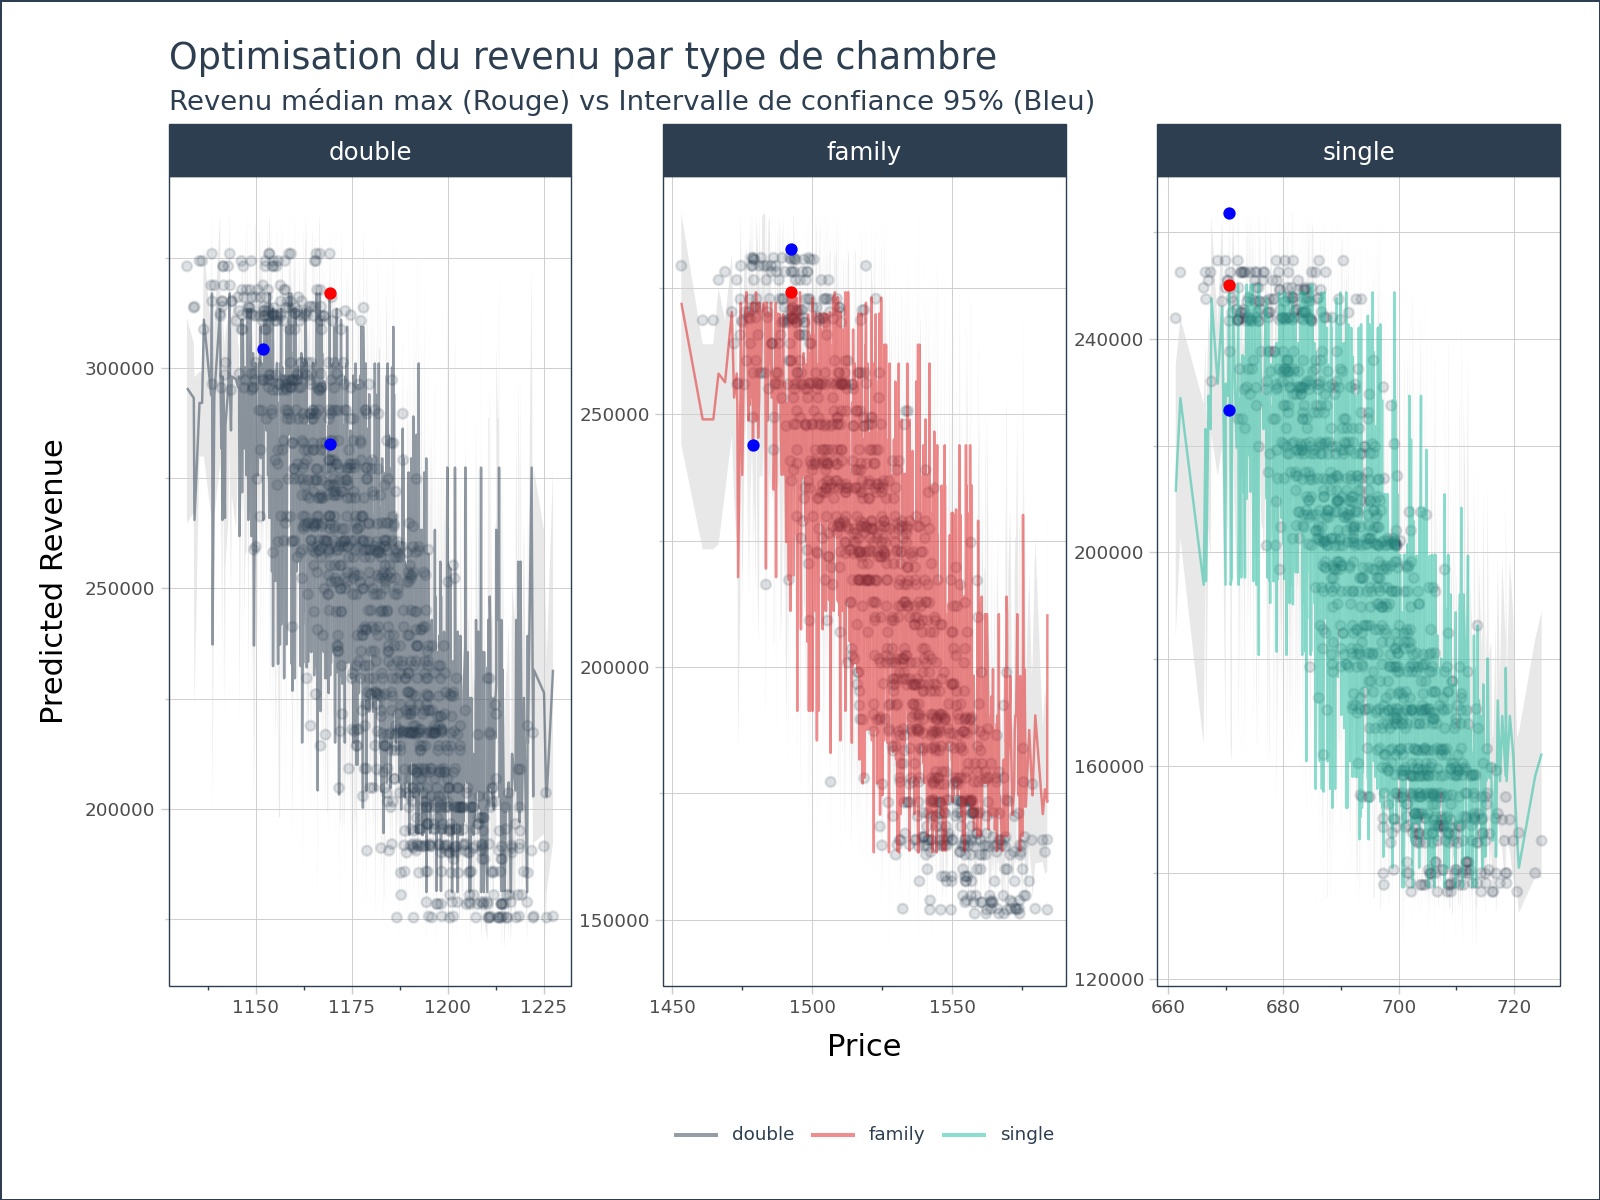

In [28]:

(
    ggplot(
        data=data_filtered,
        mapping=aes(x='paid price', y='rev__q0.5', color='type de chambre', group='type de chambre')
    ) + \
    geom_ribbon(aes(ymax='rev__q0.975', ymin='rev__q0.025'),
                fill="#d3d3d3", color="#FF000000", alpha=0.5, show_legend=False) + \
    geom_point(aes(y='rev par type de chambre'), alpha=0.15, color="#2C3E50")+
    \
    geom_line(aes(y='rev__q0.5'), alpha=0.5) + \
    geom_point(data=best_50, color='red') + \
    geom_point(data=best_975, mapping=aes(y='rev__q0.975'), color='blue') + \
    geom_point(data=best_025, mapping=aes(y='rev__q0.025'), color='blue') + \
    facet_wrap('type de chambre', scales='free') + \
    labs(
        title="Optimisation du revenu par type de chambre",
        subtitle="Revenu médian max (Rouge) vs Intervalle de confiance 95% (Bleu)",
        x="Price",
        y="Predicted Revenue"
    ) + \
    scale_color_manual(values = list(tk.palette_timetk().values())) + \
    tk.theme_timetk(width=800, height=600)
)

In [33]:
data_filtered = (
    data[
        (data['arr month'].isin([2])) &
        (data['type de chambre'] == 'single') &
        (data['event'] == 'no_promo') &
        (data['booking lead'] <= 10)
    ]
    .drop_duplicates(subset=['arrival day', 'type de chambre'], keep='first')
)


X1 = data_filtered[['paid price']]
y1= data_filtered['nbre res']

print(len(X1)) 

41


In [34]:
# Cas médian
best_50 = data_filtered.groupby('type de chambre', group_keys=False) \
    .apply(lambda x: x[x['rev__q0.5'] == x['rev__q0.5'].max()]) \
    .drop_duplicates(subset=['type de chambre']) \
    .reset_index(drop=True)

# Cas optimiste
best_975 = data_filtered.groupby('type de chambre', group_keys=False) \
    .apply(lambda x: x[x['rev__q0.025'] == x['rev__q0.025'].max()]) \
    .drop_duplicates(subset=['type de chambre']) \
    .reset_index(drop=True)

# Cas pessimiste
best_025 = data_filtered.groupby('type de chambre', group_keys=False) \
    .apply(lambda x: x[x['rev__q0.975'] == x['rev__q0.975'].max()]) \
    .drop_duplicates(subset=['type de chambre']) \
    .reset_index(drop=True)

In [35]:
best_50

,arrival day,type de chambre,booking lead,is-week-end,res day,season,arr month,arr day,is_promo,taux occ arr,nbre res,paid price,rev par type de chambre,event,pred_q0.025,pred_q0.5,pred_q0.975,rev__q0.025,rev__q0.5,rev__q0.975
0,2025-02-18,single,5,False,2025-02-13,winter,2,18,False,0.95,380,674.65,243335.32,no_promo,322,363,389,226666.18,250137.53,263549.73


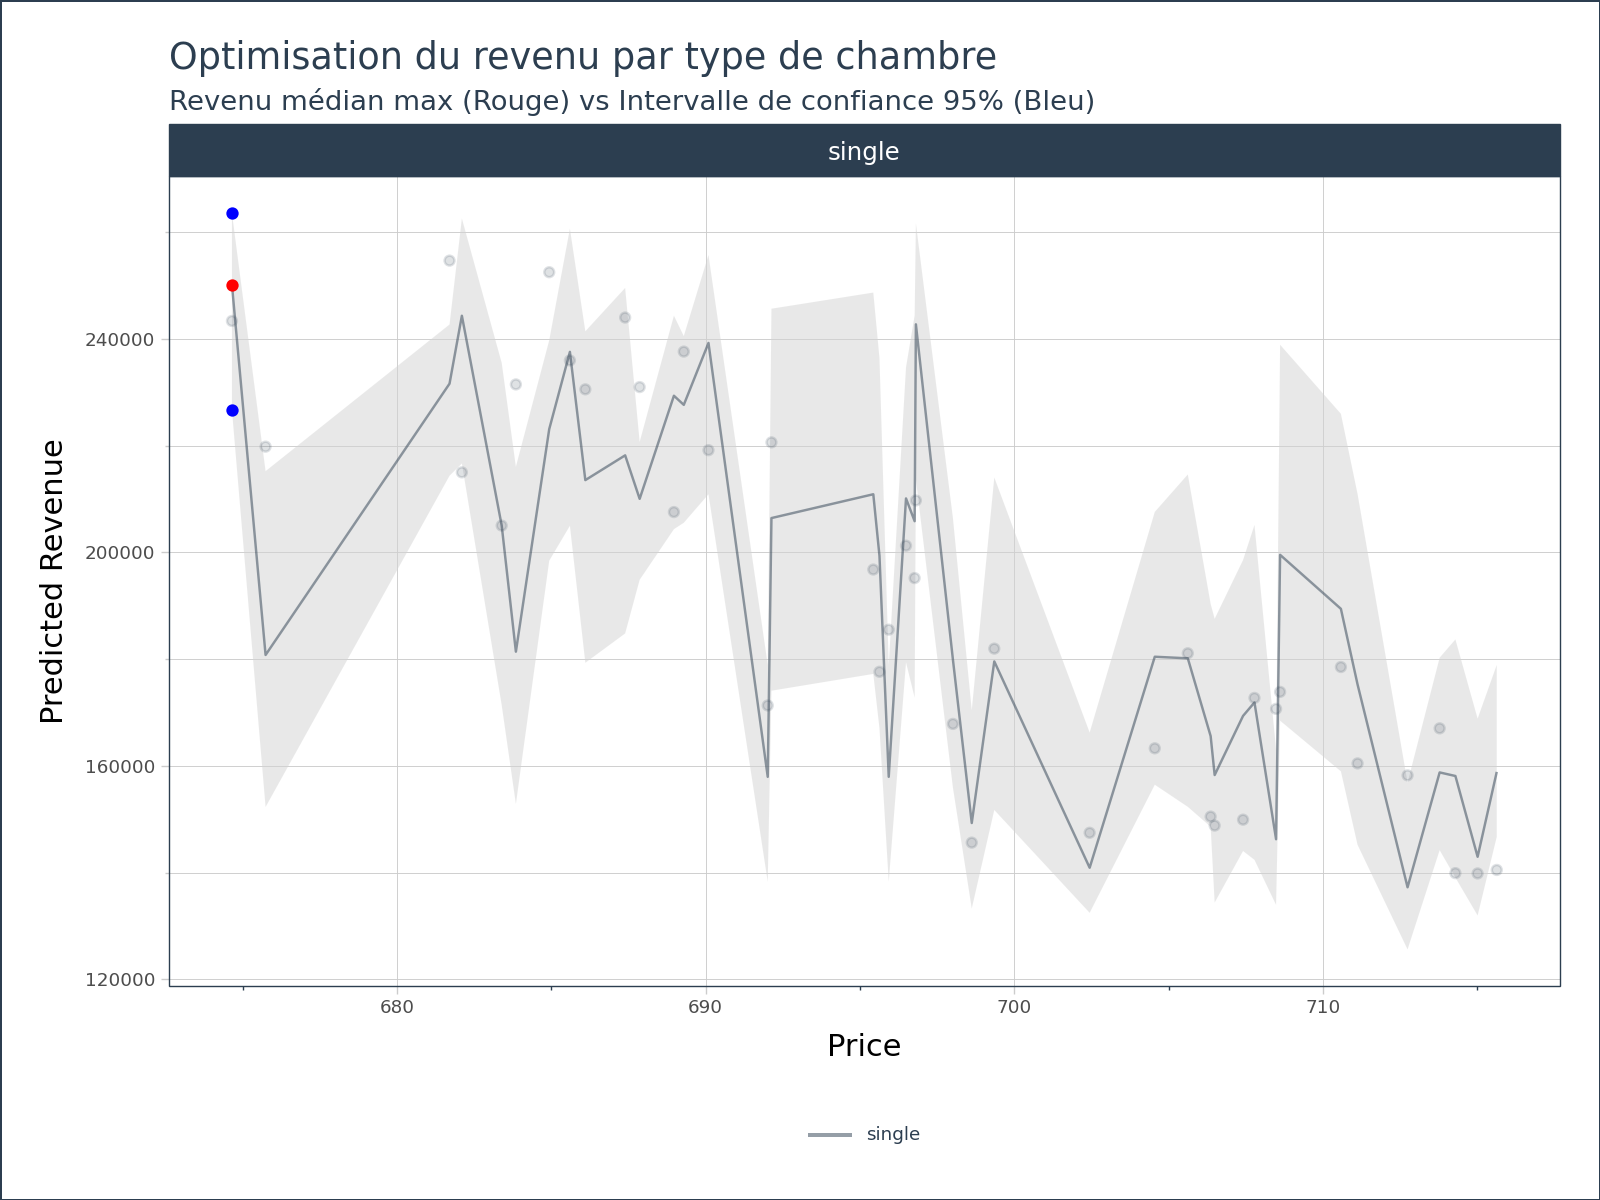

In [36]:

(
    ggplot(
        data=data_filtered,
        mapping=aes(x='paid price', y='rev__q0.5', color='type de chambre', group='type de chambre')
    ) + \
    geom_ribbon(aes(ymax='rev__q0.975', ymin='rev__q0.025'),
                fill="#d3d3d3", color="#FF000000", alpha=0.5, show_legend=False) + \
    geom_point(aes(y='rev par type de chambre'), alpha=0.15, color="#2C3E50")+
    \
    geom_line(aes(y='rev__q0.5'), alpha=0.5) + \
    geom_point(data=best_50, color='red') + \
    geom_point(data=best_975, mapping=aes(y='rev__q0.975'), color='blue') + \
    geom_point(data=best_025, mapping=aes(y='rev__q0.025'), color='blue') + \
    facet_wrap('type de chambre', scales='free') + \
    labs(
        title="Optimisation du revenu par type de chambre",
        subtitle="Revenu médian max (Rouge) vs Intervalle de confiance 95% (Bleu)",
        x="Price",
        y="Predicted Revenue"
    ) + \
    scale_color_manual(values = list(tk.palette_timetk().values())) + \
    tk.theme_timetk(width=800, height=600)
)

In [44]:
data_filtered = (
    data_try[
        (data_try['arr month'].isin([2])) &
        #(data_try['type de chambre'] == 'single') &
        (data_try['event'] == 'no_promo') &
        (data_try['booking lead'] <= 10)
    ]
    .drop_duplicates(subset=['arrival day', 'type de chambre'], keep='first')
)


X1 = data_filtered[['paid price']]
y1= data_filtered['nbre res']

print(len(X1)) 

123


In [45]:
# Cas médian
best_50 = data_filtered.groupby('type de chambre', group_keys=False) \
    .apply(lambda x: x[x['rev__q0.5'] == x['rev__q0.5'].max()]) \
    .drop_duplicates(subset=['type de chambre']) \
    .reset_index(drop=True)

# Cas optimiste
best_975 = data_filtered.groupby('type de chambre', group_keys=False) \
    .apply(lambda x: x[x['rev__q0.025'] == x['rev__q0.025'].max()]) \
    .drop_duplicates(subset=['type de chambre']) \
    .reset_index(drop=True)

# Cas pessimiste
best_025 = data_filtered.groupby('type de chambre', group_keys=False) \
    .apply(lambda x: x[x['rev__q0.975'] == x['rev__q0.975'].max()]) \
    .drop_duplicates(subset=['type de chambre']) \
    .reset_index(drop=True)

### l rev ghalet parce qu'il est différent pour le meme arr day (just nbre de res pred*paid price)

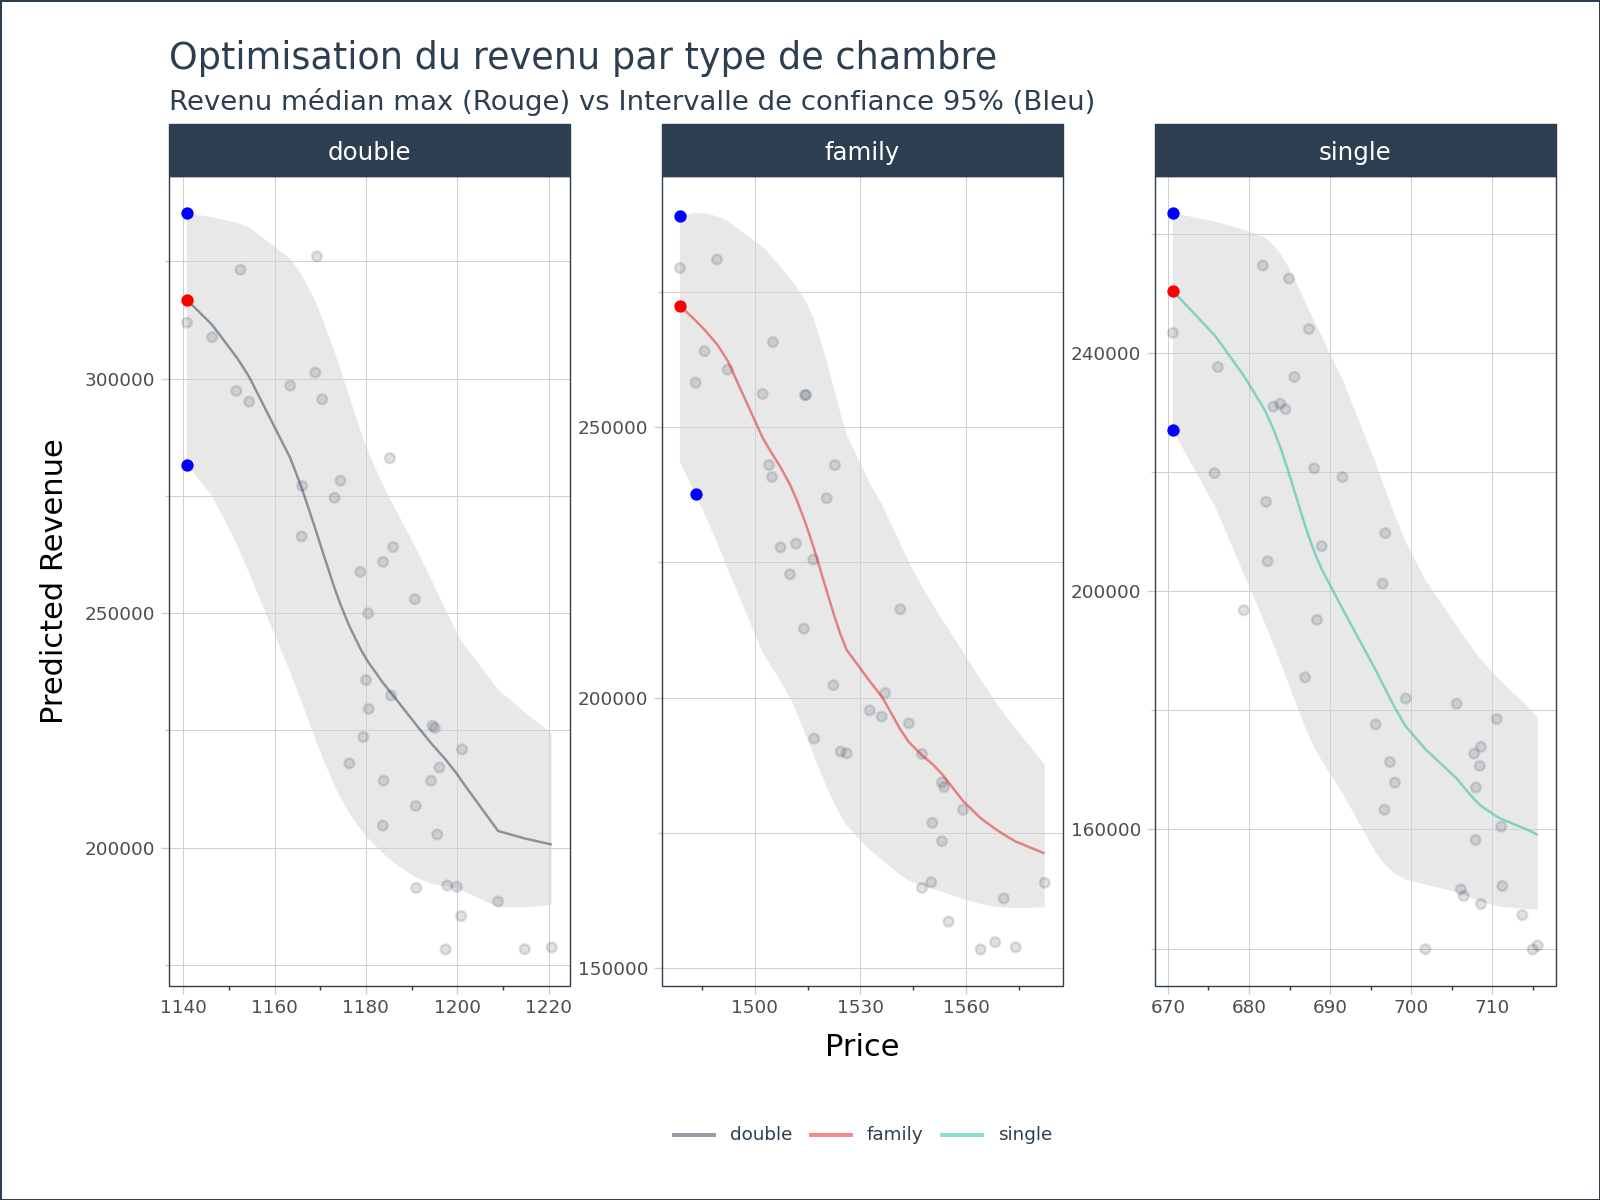

In [46]:

(
    ggplot(
        data=data_filtered,
        mapping=aes(x='paid price', y='rev__q0.5', color='type de chambre', group='type de chambre')
    ) + \
    geom_ribbon(aes(ymax='rev__q0.975', ymin='rev__q0.025'),
                fill="#d3d3d3", color="#FF000000", alpha=0.5, show_legend=False) + \
    geom_point(aes(y='rev par type de chambre'), alpha=0.15, color="#2C3E50")+
    \
    geom_line(aes(y='rev__q0.5'), alpha=0.5) + \
    geom_point(data=best_50, color='red') + \
    geom_point(data=best_975, mapping=aes(y='rev__q0.975'), color='blue') + \
    geom_point(data=best_025, mapping=aes(y='rev__q0.025'), color='blue') + \
    facet_wrap('type de chambre', scales='free') + \
    labs(
        title="Optimisation du revenu par type de chambre",
        subtitle="Revenu médian max (Rouge) vs Intervalle de confiance 95% (Bleu)",
        x="Price",
        y="Predicted Revenue"
    ) + \
    scale_color_manual(values = list(tk.palette_timetk().values())) + \
    tk.theme_timetk(width=800, height=600)
)

In [48]:
df_smooth=data.copy()

In [49]:
df_smooth

,arrival day,type de chambre,booking lead,is-week-end,res day,season,arr month,arr day,is_promo,taux occ arr,nbre res,paid price,rev par type de chambre,event,pred_q0.025,pred_q0.5,pred_q0.975,rev__q0.025,rev__q0.5,rev__q0.975
0,2024-01-01,single,2,False,2023-12-30,winter,1,1,False,0.36,144,728.13,97643.77,no_promo,124,139,167,90288.12,101210.07,121597.71
1,2024-01-01,single,62,False,2023-10-31,winter,1,1,False,0.36,144,676.01,97643.77,no_promo,125,141,173,90288.12,101210.07,121597.71
2,2024-01-01,single,71,False,2023-10-22,winter,1,1,False,0.36,144,667.57,97643.77,no_promo,132,167,211,90288.12,101210.07,121597.71
3,2024-01-01,single,49,False,2023-11-13,winter,1,1,True,0.36,144,639.01,97643.77,is_promo,126,146,182,90288.12,101210.07,121597.71
4,2024-01-01,single,0,False,2024-01-01,winter,1,1,False,0.36,144,722.32,97643.77,no_promo,126,149,187,90288.12,101210.07,121597.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267970,2025-06-30,family,80,False,2025-04-11,summer,6,30,False,0.35,70,1465.57,104947.60,no_promo,68,87,108,98820.48,120437.46,154407.00
267971,2025-06-30,family,12,False,2025-06-18,summer,6,30,False,0.35,70,1592.27,104947.60,no_promo,63,73,92,98820.48,120437.46,154407.00
267972,2025-06-30,family,6,False,2025-06-24,summer,6,30,True,0.35,70,1468.10,104947.60,is_promo,65,78,97,98820.48,120437.46,154407.00
267973,2025-06-30,family,5,False,2025-06-25,summer,6,30,True,0.35,70,1470.13,104947.60,is_promo,64,77,95,98820.48,120437.46,154407.00


### ajout des colonnes moyennes des revenues à data_try

In [68]:
data_try['rev__q0.025_m'] = data_try.groupby(['arrival day', 'type de chambre'])['rev__q0.025'].transform('mean')
data_try['rev__q0.5_m']   = data_try.groupby(['arrival day', 'type de chambre'])['rev__q0.5'].transform('mean')
data_try['rev__0.975_m']  = data_try.groupby(['arrival day', 'type de chambre'])['rev__q0.975'].transform('mean')

In [91]:
data_try

,arrival day,type de chambre,booking lead,is-week-end,res day,season,arr month,arr day,is_promo,taux occ arr,...,event,pred_q0.025,pred_q0.5,pred_q0.975,rev__q0.025,rev__q0.5,rev__q0.975,rev__q0.025_m,rev__q0.5_m,rev__0.975_m
0,2024-01-01,single,2,False,2023-12-30,winter,1,1,False,0.36,...,no_promo,124.368396,139.183923,166.975651,90556.360418,101343.990023,121579.980603,90890.448112,111088.488031,135951.272189
1,2024-01-01,single,62,False,2023-10-31,winter,1,1,False,0.36,...,no_promo,124.932669,141.352999,173.010672,84455.733538,95556.040673,116956.944154,90890.448112,111088.488031,135951.272189
2,2024-01-01,single,71,False,2023-10-22,winter,1,1,False,0.36,...,no_promo,131.622044,166.973633,210.676371,87866.928103,111466.588096,140641.224928,90890.448112,111088.488031,135951.272189
3,2024-01-01,single,49,False,2023-11-13,winter,1,1,True,0.36,...,is_promo,125.844812,145.770657,182.286368,80416.093195,93148.907295,116482.812068,90890.448112,111088.488031,135951.272189
4,2024-01-01,single,0,False,2024-01-01,winter,1,1,False,0.36,...,no_promo,126.174469,148.988993,187.222608,91138.342315,107617.729210,135234.634181,90890.448112,111088.488031,135951.272189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267970,2025-06-30,family,80,False,2025-04-11,summer,6,30,False,0.35,...,no_promo,67.922484,87.055776,108.031225,99545.154183,127586.333131,158327.322844,100972.358927,124426.187432,152670.130987
267971,2025-06-30,family,12,False,2025-06-18,summer,6,30,False,0.35,...,no_promo,62.731404,72.875287,91.672242,99885.333427,116037.133709,145966.960623,100972.358927,124426.187432,152670.130987
267972,2025-06-30,family,6,False,2025-06-24,summer,6,30,True,0.35,...,is_promo,64.501180,77.846902,96.764855,94694.181637,114287.037200,142060.483299,100972.358927,124426.187432,152670.130987
267973,2025-06-30,family,5,False,2025-06-25,summer,6,30,True,0.35,...,is_promo,64.104430,76.835593,95.187637,94241.846306,112958.310287,139938.201312,100972.358927,124426.187432,152670.130987


In [93]:
data_filtered = (
    data_try[
        (data_try['arr month'].isin([2])) &
        #(data_try['type de chambre'] == 'single') &
        (data_try['event'] == 'no_promo') &
        (data_try['booking lead'] <= 10)
    ]
    .drop_duplicates(subset=['arrival day', 'type de chambre'], keep='first')
)


X1 = data_filtered[['paid price']]
y1= data_filtered['nbre res']

print(len(X1)) 

41


In [86]:
# Cas médian
best_50 = data_filtered.groupby('type de chambre', group_keys=False) \
    .apply(lambda x: x[x['rev__q0.5_m'] == x['rev__q0.5_m'].max()]) \
    .drop_duplicates(subset=['type de chambre']) \
    .reset_index(drop=True)

# Cas optimiste
best_975 = data_filtered.groupby('type de chambre', group_keys=False) \
    .apply(lambda x: x[x['rev__q0.025_m'] == x['rev__q0.025_m'].max()]) \
    .drop_duplicates(subset=['type de chambre']) \
    .reset_index(drop=True)

# Cas pessimiste
best_025 = data_filtered.groupby('type de chambre', group_keys=False) \
    .apply(lambda x: x[x['rev__0.975_m'] == x['rev__0.975_m'].max()]) \
    .drop_duplicates(subset=['type de chambre']) \
    .reset_index(drop=True)

## meilleure courbe coté fluctuation, moyenne des rev__q0.025 pour les lignes ayant meme type de chambre meme arr day

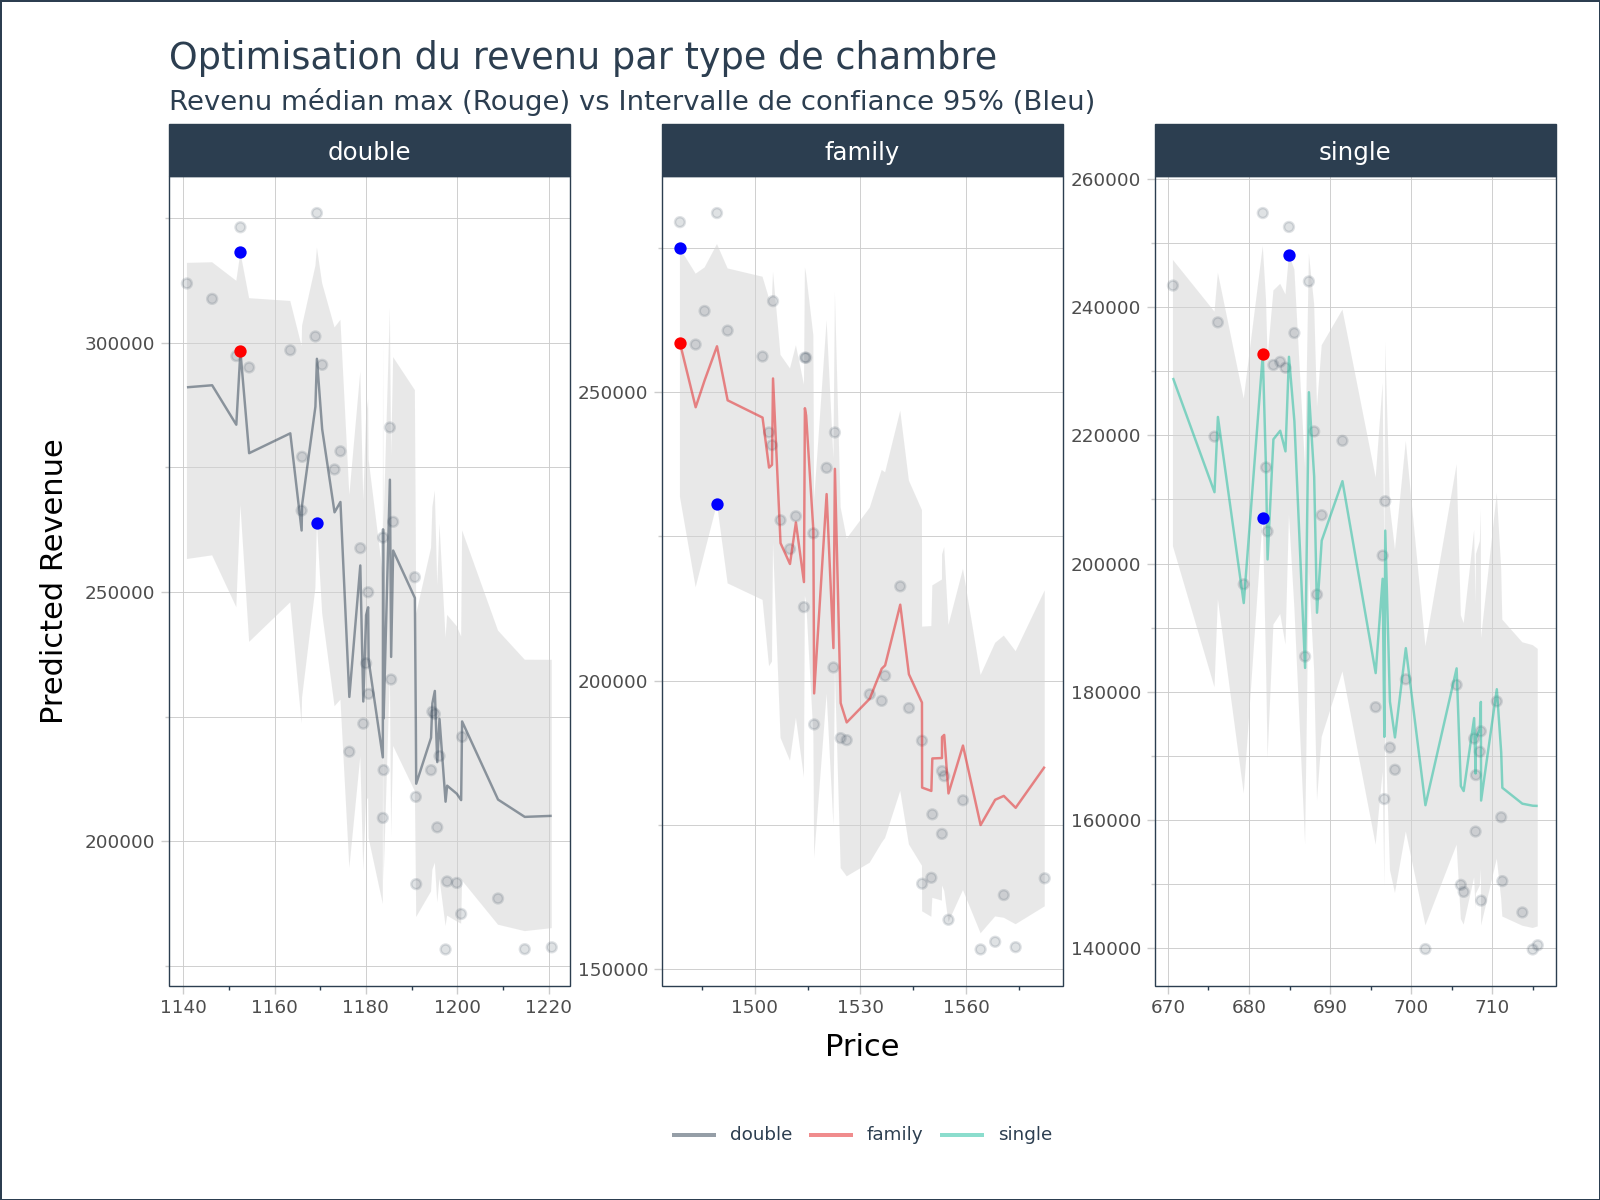

In [87]:

(
    ggplot(
        data=data_filtered,
        mapping=aes(x='paid price', y='rev__q0.5_m', color='type de chambre', group='type de chambre')
    ) + \
    geom_ribbon(aes(ymax='rev__0.975_m', ymin='rev__q0.025_m'),
                fill="#d3d3d3", color="#FF000000", alpha=0.5, show_legend=False) + \
    geom_point(aes(y='rev par type de chambre'), alpha=0.15, color="#2C3E50")+
    \
    geom_line(aes(y='rev__q0.5_m'), alpha=0.5) + \
    geom_point(data=best_50, color='red') + \
    geom_point(data=best_975, mapping=aes(y='rev__0.975_m'), color='blue') + \
    geom_point(data=best_025, mapping=aes(y='rev__q0.025_m'), color='blue') + \
    facet_wrap('type de chambre', scales='free') + \
    labs(
        title="Optimisation du revenu par type de chambre",
        subtitle="Revenu médian max (Rouge) vs Intervalle de confiance 95% (Bleu)",
        x="Price",
        y="Predicted Revenue"
    ) + \
    scale_color_manual(values = list(tk.palette_timetk().values())) + \
    tk.theme_timetk(width=800, height=600)
)

### Essai de smoothing

In [118]:
data_filtered = (
    data_try[
        (data_try['arr month'].isin([2])) &
        #(data_try['type de chambre'] == 'single') &
        (data_try['event'] == 'no_promo') &
        (data_try['booking lead'] <= 10)
    ]
    .drop_duplicates(subset=['arrival day', 'type de chambre'], keep='first')
)


X1 = data_filtered[['paid price']]
y1= data_filtered['nbre res']

print(len(X1)) 

123


In [132]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import numpy as np

# Trier les données par paid price
data_filtered = data_filtered.sort_values('paid price')

# Lissage LOWESS pour chaque type de chambre
def smooth_group(df, ycol):
    smoothed = lowess(df[ycol], df['paid price'], frac=0.3, return_sorted=False)
    return smoothed

# Appliquer le lissage à chaque groupe
data_filtered['rev__q0.5_smooth'] = data_filtered.groupby('type de chambre', group_keys=False)\
    .apply(lambda g: pd.Series(smooth_group(g, 'rev__q0.5_m'), index=g.index))\
    .sort_index()

data_filtered['rev__q0.025_smooth'] = data_filtered.groupby('type de chambre', group_keys=False)\
    .apply(lambda g: pd.Series(smooth_group(g, 'rev__q0.025_m'), index=g.index))\
    .sort_index()

data_filtered['rev__0.975_smooth'] = data_filtered.groupby('type de chambre', group_keys=False)\
    .apply(lambda g: pd.Series(smooth_group(g, 'rev__0.975_m'), index=g.index))\
    .sort_index()


In [133]:
data_filtered

,arrival day,type de chambre,booking lead,is-week-end,res day,season,arr month,arr day,is_promo,taux occ arr,...,pred_q0.975,rev__q0.025,rev__q0.5,rev__q0.975,rev__q0.025_m,rev__q0.5_m,rev__0.975_m,rev__q0.5_smooth,rev__q0.025_smooth,rev__0.975_smooth
198504,2025-02-18,single,10,False,2025-02-08,winter,2,18,False,0.95,...,392.848166,226962.336879,250350.413954,263447.908789,202690.253948,228935.046148,247334.503686,226566.918411,200351.419635,246422.361730
195401,2025-02-12,single,4,False,2025-02-08,winter,2,12,False,0.84,...,387.765909,214362.630488,242955.027828,262028.935133,180712.937177,211121.862063,239270.442094,218078.794639,189495.630693,241791.353892
191476,2025-02-06,single,10,False,2025-01-27,winter,2,6,False,0.92,...,387.291568,213086.656205,242200.181056,261871.066921,194391.772805,222852.551135,245333.893558,217347.395094,188577.573698,241403.124519
200380,2025-02-21,single,9,False,2025-02-12,winter,2,21,False,0.75,...,383.730420,202882.158624,236143.115410,260687.260897,164153.516569,193840.622575,225721.100180,214493.226726,184700.208930,239838.938692
10328,2024-02-02,single,0,False,2024-02-02,winter,2,2,False,0.99,...,380.668452,195408.590948,230960.031676,259501.683896,207130.671870,232609.340834,249530.594531,211030.668943,178426.914896,238026.326838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196521,2025-02-13,family,5,False,2025-02-08,winter,2,13,False,0.52,...,130.029009,161815.898704,177679.172514,203374.472424,156215.806145,174968.559881,200972.347568,181434.233292,159604.618879,209977.459509
191376,2025-02-05,family,7,False,2025-01-29,winter,2,5,False,0.52,...,127.098122,161323.024440,175716.103489,199315.274216,159132.906071,179345.283659,206538.034530,180016.823614,158928.205609,207938.741341
18828,2024-02-16,family,3,False,2024-02-13,winter,2,16,False,0.55,...,125.480025,161157.696942,174667.440689,197085.200842,158901.215809,180015.415511,207791.367966,180289.177119,159009.304488,208357.513384
21303,2024-02-21,family,6,False,2024-02-15,winter,2,21,False,0.52,...,123.389261,161059.823005,173371.529162,194215.930732,157784.799769,177953.129906,205089.397492,180690.198338,159125.499353,208996.912212


In [120]:
# Cas médian
best_50 = data_filtered.groupby('type de chambre', group_keys=False) \
    .apply(lambda x: x[x['rev__q0.5_smooth'] == x['rev__q0.5_smooth'].max()]) \
    .drop_duplicates(subset=['type de chambre']) \
    .reset_index(drop=True)

# Cas optimiste
best_975 = data_filtered.groupby('type de chambre', group_keys=False) \
    .apply(lambda x: x[x['rev__q0.025_smooth'] == x['rev__q0.025_smooth'].max()]) \
    .drop_duplicates(subset=['type de chambre']) \
    .reset_index(drop=True)

# Cas pessimiste
best_025 = data_filtered.groupby('type de chambre', group_keys=False) \
    .apply(lambda x: x[x['rev__0.975_smooth'] == x['rev__0.975_smooth'].max()]) \
    .drop_duplicates(subset=['type de chambre']) \
    .reset_index(drop=True)

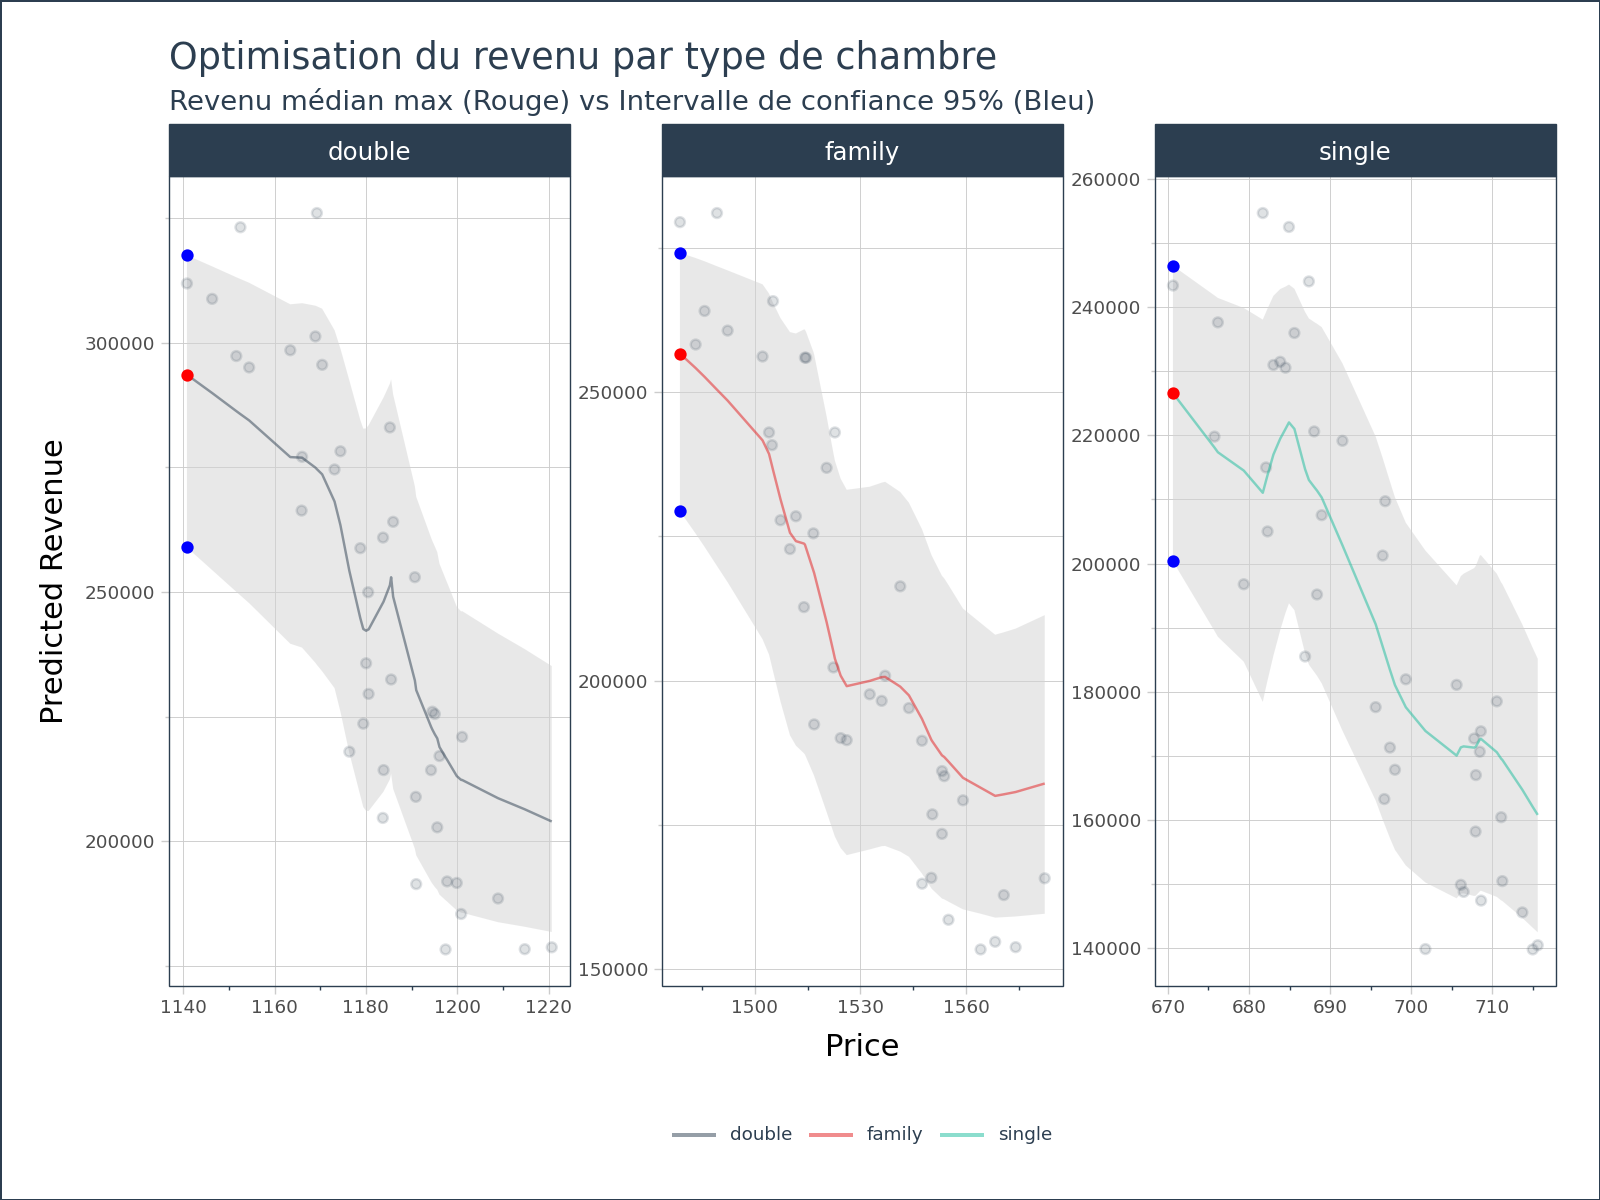

In [121]:
#plot only single room

(
    ggplot(
        data=data_filtered,
        mapping=aes(x='paid price', y='rev__q0.5_smooth', color='type de chambre', group='type de chambre')
    ) + \
    geom_ribbon(aes(ymax='rev__0.975_smooth', ymin='rev__q0.025_smooth'),
                fill="#d3d3d3", color="#FF000000", alpha=0.5, show_legend=False) + \
    geom_point(aes(y='rev par type de chambre'), alpha=0.15, color="#2C3E50")+
    \
    geom_line(aes(y='rev__q0.5_smooth'), alpha=0.5) + \
    geom_point(data=best_50, color='red') + \
    geom_point(data=best_975, mapping=aes(y='rev__0.975_smooth'), color='blue') + \
    geom_point(data=best_025, mapping=aes(y='rev__q0.025_smooth'), color='blue') + \
    facet_wrap('type de chambre', scales='free') + \
    labs(
        title="Optimisation du revenu par type de chambre",
        subtitle="Revenu médian max (Rouge) vs Intervalle de confiance 95% (Bleu)",
        x="Price",
        y="Predicted Revenue"
    ) + \
    scale_color_manual(values = list(tk.palette_timetk().values())) + \
    tk.theme_timetk(width=800, height=600)
)

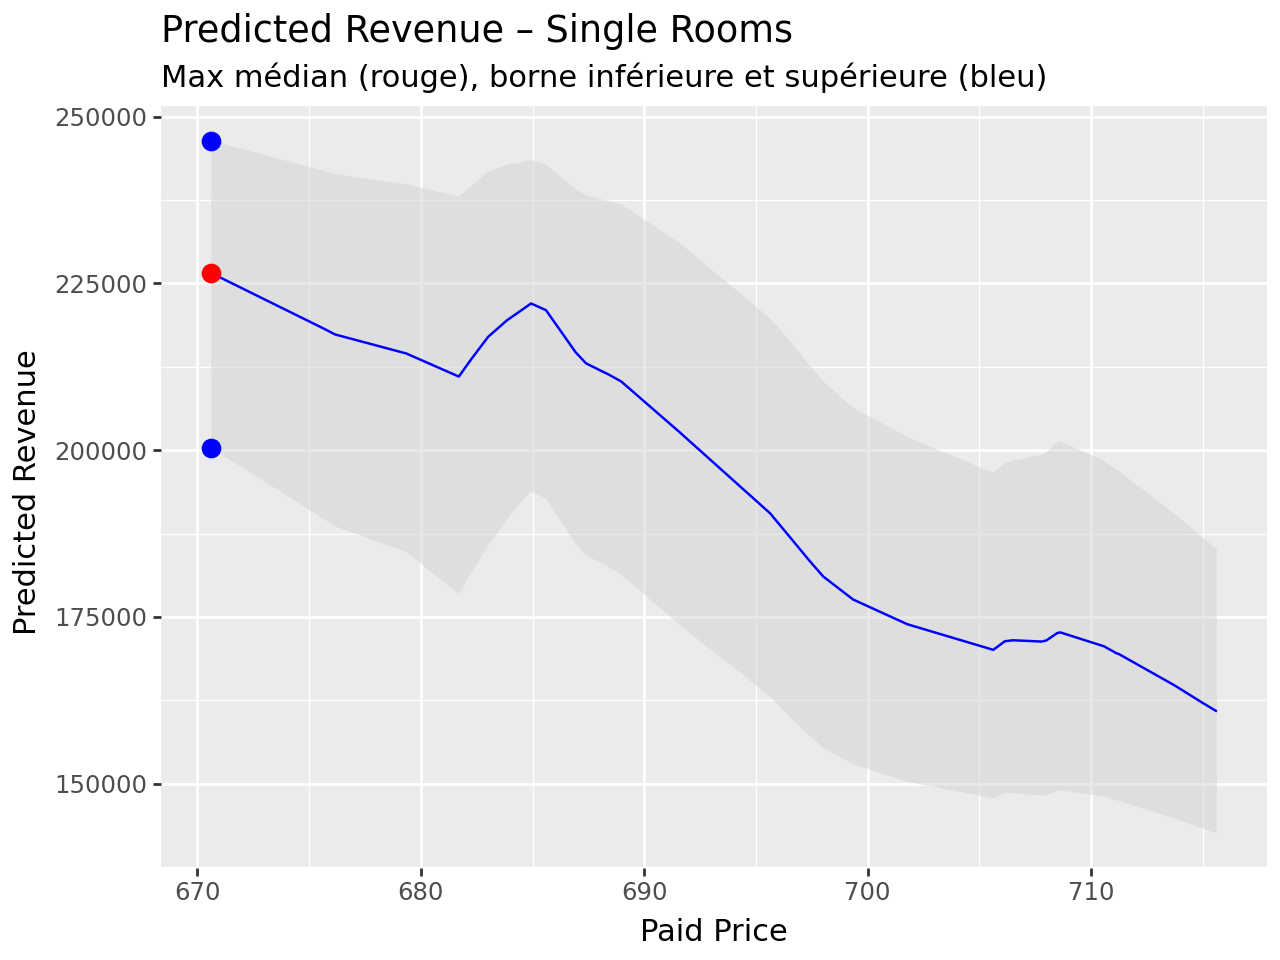

In [128]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import numpy as np
import pandas as pd
from plotnine import *

# 1. Filtrer les chambres 'single'
data_single = data_filtered[data_filtered['type de chambre'] == 'single'].copy()

# 2. Trier
data_single = data_single.sort_values('paid price')

# 3. LOWESS smoothing
def smooth_group(df, ycol):
    smoothed = lowess(df[ycol], df['paid price'], frac=0.3, return_sorted=False)
    return smoothed

data_single['rev__q0.5_smoothed'] = smooth_group(data_single, 'rev__q0.5_m')
data_single['rev__q0.025_smoothed'] = smooth_group(data_single, 'rev__q0.025_m')
data_single['rev__0.975_smoothed'] = smooth_group(data_single, 'rev__0.975_m')

# 4. Best points (uniquement pour type de chambre == 'single')
best_50 = data_single.loc[[data_single['rev__q0.5_smoothed'].idxmax()]]
best_975 = data_single.loc[[data_single['rev__q0.025_smoothed'].idxmax()]]
best_025 = data_single.loc[[data_single['rev__0.975_smoothed'].idxmax()]]

# 5. Plot
(
    ggplot(data=data_single, mapping=aes(x='paid price', y='rev__q0.5_smoothed')) +
    geom_ribbon(
        aes(ymin='rev__q0.025_smoothed', ymax='rev__0.975_smoothed'),
        fill="#d3d3d3", alpha=0.5
    ) +
    geom_line(color='blue') +
    geom_point(data=best_50, color='red', size=3) +
    geom_point(data=best_975, mapping=aes(y='rev__q0.025_smoothed'), color='blue', size=3) +
    geom_point(data=best_025, mapping=aes(y='rev__0.975_smoothed'), color='blue', size=3) +
    labs(
        title="Predicted Revenue – Single Rooms",
        subtitle="Max médian (rouge), borne inférieure et supérieure (bleu)",
        x="Paid Price",
        y="Predicted Revenue "
    )
)


In [130]:
data_try

,arrival day,type de chambre,booking lead,is-week-end,res day,season,arr month,arr day,is_promo,taux occ arr,...,event,pred_q0.025,pred_q0.5,pred_q0.975,rev__q0.025,rev__q0.5,rev__q0.975,rev__q0.025_m,rev__q0.5_m,rev__0.975_m
0,2024-01-01,single,2,False,2023-12-30,winter,1,1,False,0.36,...,no_promo,124.368396,139.183923,166.975651,90556.360418,101343.990023,121579.980603,90890.448112,111088.488031,135951.272189
1,2024-01-01,single,62,False,2023-10-31,winter,1,1,False,0.36,...,no_promo,124.932669,141.352999,173.010672,84455.733538,95556.040673,116956.944154,90890.448112,111088.488031,135951.272189
2,2024-01-01,single,71,False,2023-10-22,winter,1,1,False,0.36,...,no_promo,131.622044,166.973633,210.676371,87866.928103,111466.588096,140641.224928,90890.448112,111088.488031,135951.272189
3,2024-01-01,single,49,False,2023-11-13,winter,1,1,True,0.36,...,is_promo,125.844812,145.770657,182.286368,80416.093195,93148.907295,116482.812068,90890.448112,111088.488031,135951.272189
4,2024-01-01,single,0,False,2024-01-01,winter,1,1,False,0.36,...,no_promo,126.174469,148.988993,187.222608,91138.342315,107617.729210,135234.634181,90890.448112,111088.488031,135951.272189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267970,2025-06-30,family,80,False,2025-04-11,summer,6,30,False,0.35,...,no_promo,67.922484,87.055776,108.031225,99545.154183,127586.333131,158327.322844,100972.358927,124426.187432,152670.130987
267971,2025-06-30,family,12,False,2025-06-18,summer,6,30,False,0.35,...,no_promo,62.731404,72.875287,91.672242,99885.333427,116037.133709,145966.960623,100972.358927,124426.187432,152670.130987
267972,2025-06-30,family,6,False,2025-06-24,summer,6,30,True,0.35,...,is_promo,64.501180,77.846902,96.764855,94694.181637,114287.037200,142060.483299,100972.358927,124426.187432,152670.130987
267973,2025-06-30,family,5,False,2025-06-25,summer,6,30,True,0.35,...,is_promo,64.104430,76.835593,95.187637,94241.846306,112958.310287,139938.201312,100972.358927,124426.187432,152670.130987
